# ----------Classification using CNN----------

# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#tf.keras.utils.image_dataset_from_directory?

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data', 
                                                   class_names=["buildings","forest","glacier","mountain","sea","street"],
                                                   image_size=(150,150))
test = tf.keras.utils.image_dataset_from_directory('test', 
                                                   class_names=["buildings","forest","glacier","mountain","sea","street"],
                                                   image_size=(150,150))

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [8]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
class_names=["buildings","forest","glacier","mountain","sea","street"]

In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

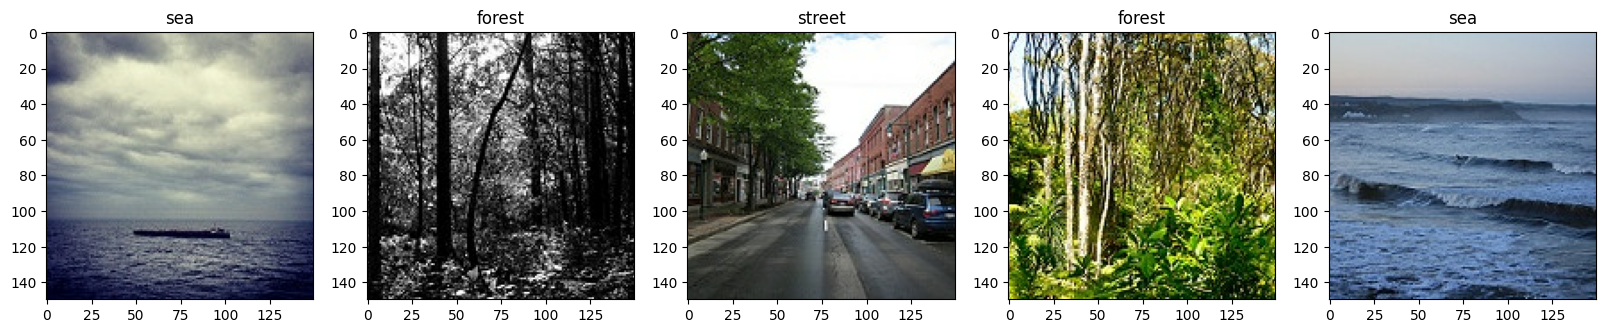

In [12]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(class_names[batch[1][idx]])

# Scale Data

In [13]:
test = test.map(lambda x,y: (x/255, y))

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
#data.as_numpy_iterator().next()

#  Split Data

In [16]:
test_size = int(len(test))
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)

In [17]:
train_size

351

In [18]:
test_size

94

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

# Build Deep Learning Model

In [20]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [22]:
model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters = 32,kernel_size=(3,3),padding = 'same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters= 64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(filters= 64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(filters= 128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(filters= 128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(filters= 256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(filters= 256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [23]:
model.compile('adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

# Train

In [25]:
hist = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
351/351 [==============================] - 61s 98ms/step - loss: 1.1496 - accuracy: 0.5255 - val_loss: 0.9379 - val_accuracy: 0.5955
Epoch 2/10
351/351 [==============================] - 34s 96ms/step - loss: 0.8192 - accuracy: 0.6801 - val_loss: 0.7611 - val_accuracy: 0.7047
Epoch 3/10
351/351 [==============================] - 36s 103ms/step - loss: 0.6409 - accuracy: 0.7673 - val_loss: 0.6144 - val_accuracy: 0.7841
Epoch 4/10
351/351 [==============================] - 32s 92ms/step - loss: 0.5259 - accuracy: 0.8137 - val_loss: 0.4755 - val_accuracy: 0.8294
Epoch 5/10
351/351 [==============================] - 33s 93ms/step - loss: 0.4622 - accuracy: 0.8362 - val_loss: 0.4398 - val_accuracy: 0.8405
Epoch 6/10
351/351 [==============================] - 32s 92ms/step - loss: 0.4109 - accuracy: 0.8535 - val_loss: 0.5126 - val_accuracy: 0.8175
Epoch 7/10
351/351 [==============================] - 32s 92ms/step - loss: 0.3633 - accuracy: 0.8762 - val_loss: 0.4485 - val_accuracy

# Plot Performance

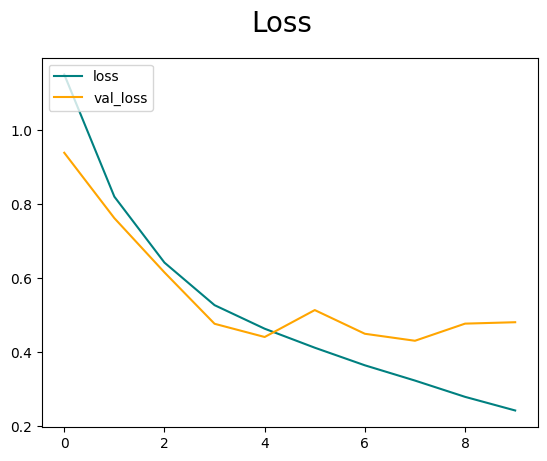

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

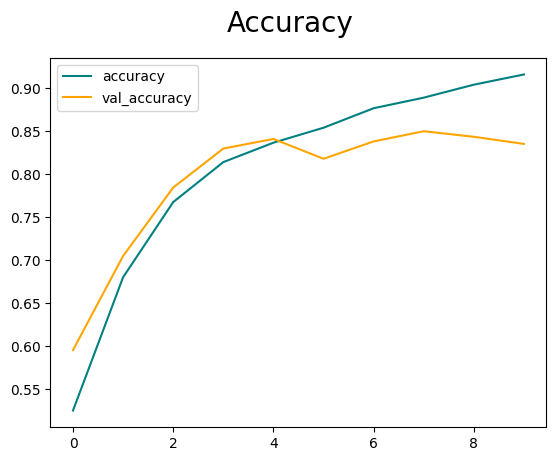

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [28]:
test_loss, test_acc = model.evaluate(test)

94/94 [==============================] - 3s 31ms/step - loss: 0.5168 - accuracy: 0.8323


In [34]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/2d/30/3afb8bcb785653254eb646ff2680ec4d637b40b06f4b046aca17b5e086b0/scikit_learn-1.3.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/e9/20/2d0561ab54d857365926c5b53538369a7b8d6ccbffaca509305b074028cd/scipy-1.11.2-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.1 kB ? eta -:--:--
     ---------------------------------------- 59.1/59.1 kB 1.1 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pyt

In [35]:

from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


In [30]:
true_labels = []
predicted_labels = []

for batch in test.as_numpy_iterator(): 
    batch_data, batch_labels = batch
    # Make predictions on the batch
    predictions = model.predict(batch_data)
    
    # Convert predicted labels to integers
    batch_predicted_labels = np.argmax(predictions, axis=1)
    
    # Append true and predicted labels to the respective lists
    true_labels.extend(batch_labels)
    predicted_labels.extend(batch_predicted_labels)

1/1 [==============================] - 0s 183ms/step


In [36]:
confusion = confusion_matrix(true_labels, predicted_labels)
print(confusion)

[[344   3   6  16  11  57]
 [  9 440   2   8   3  12]
 [  3   2 429  75  36   8]
 [  3   0  68 432  22   0]
 [  9   2  25  47 420   7]
 [ 49   3   4   3  10 432]]


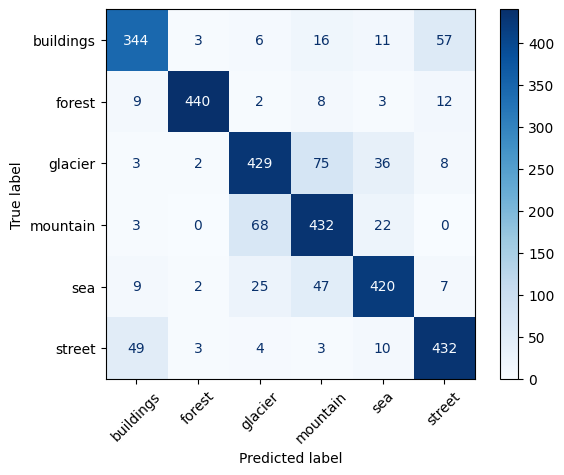

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)

In [66]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       437
           1       0.98      0.94      0.96       474
           2       0.81      0.72      0.77       553
           3       0.76      0.82      0.79       525
           4       0.80      0.85      0.82       510
           5       0.84      0.84      0.84       501

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



# Test

1/1 [==============================] - 0s 32ms/step


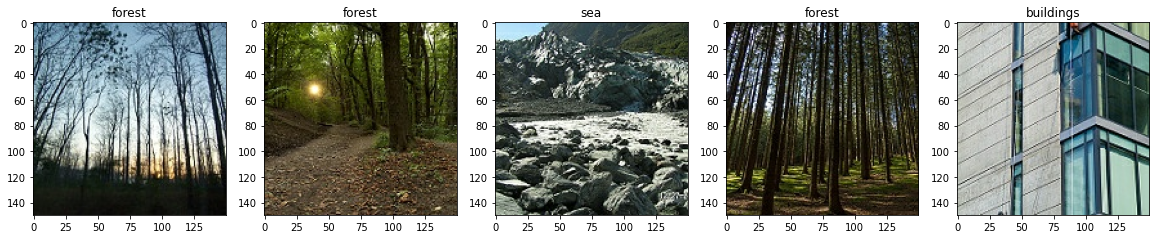

In [83]:
test_iterator = test.as_numpy_iterator()
test_batch = test_iterator.next()
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(test_batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    resize = tf.image.resize(img, (150,150))
    prediction = model.predict(np.expand_dims(resize/255, 0))
    predicted_lable = int(prediction.argmax(axis=1))
    ax[idx].title.set_text(class_names[predicted_lable])

# ----------SVM Classification----------

## Loading Training DATA

In [1]:

import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
Categories=["buildings","forest","glacier","mountain","sea","street"]
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='Data' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(64,64,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1]#output data

loading... category : buildings
loaded category:buildings successfully
loading... category : forest
loaded category:forest successfully
loading... category : glacier
loaded category:glacier successfully
loading... category : mountain
loaded category:mountain successfully
loading... category : sea
loaded category:sea successfully
loading... category : street
loaded category:street successfully


## Apply PCA in Train Data

In [3]:
pca = PCA(n_components=0.9)
X_train = pca.fit_transform(x)

In [4]:
X_train.shape

(14034, 282)

# Testing DATA load and Transform

In [10]:
Categories=["buildings","forest","glacier","mountain","sea","street"]
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='test' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(64,64,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_Test=pd.DataFrame(flat_data) #dataframe
df_Test['Target']=target
x_Test=df_Test.iloc[:,:-1] #input data 
y_Test=df_Test.iloc[:,-1]#output data

loading... category : buildings
loaded category:buildings successfully
loading... category : forest
loaded category:forest successfully
loading... category : glacier
loaded category:glacier successfully
loading... category : mountain
loaded category:mountain successfully
loading... category : sea
loaded category:sea successfully
loading... category : street
loaded category:street successfully


In [11]:
x_Test.shape

(3000, 12288)

In [12]:
x_Test_reduce=pca.transform(x_Test)

In [16]:
x_Test_reduce.shape

(3000, 282)

## Model Training

In [6]:
classifier = SVC()
classifier.fit(X_train,y)

SVC()

## Model Evaluation

In [13]:
ypredTest = classifier.predict(x_Test_reduce)

In [84]:
from sklearn.metrics import accuracy_score
SVMaccuracy = accuracy_score(y_Test,ypredTest)

In [85]:
SVMaccuracy

0.6486666666666666

In [14]:

print(classification_report(y_Test,ypredTest))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55       437
           1       0.77      0.82      0.80       474
           2       0.63      0.68      0.65       553
           3       0.62      0.67      0.65       525
           4       0.61      0.46      0.53       510
           5       0.66      0.73      0.69       501

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.64      3000
weighted avg       0.65      0.65      0.64      3000



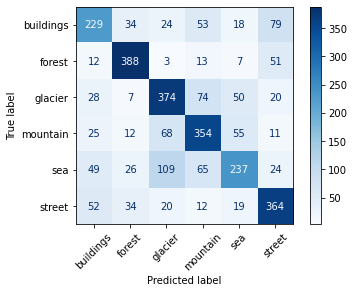

In [23]:
confusion = confusion_matrix(y_Test,ypredTest)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=Categories)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)

# Comparision CNN vs SVM

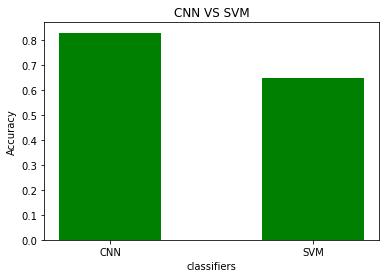

In [90]:
classifiers=["CNN","SVM"]
acc = [test_acc,SVMaccuracy]
plt.bar(classifiers, acc,width=0.5,color="green")

# Add labels and title
plt.xlabel('classifiers')
plt.ylabel('Accuracy')
plt.title('CNN VS SVM')
plt.show()